Описание задания:  
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.  
Этапы работы:  
1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.  
а) Проверьте количество записей для каждого класса. Сделайте вывод.  
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.  
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).  
6. Обработайте выбросы в данных.  
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?  
b) Исследуйте признаки на выбросы несколькими способами.  
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.  
7. Повторите п. 4, п. 5.  
8. Сформулируйте выводы по проделанной работе.  
а) Кратко опишите, какие преобразования были сделаны с данными.  
b) Сравните точность двух моделей.  
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/glass.csv')
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


Первичный анализ.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


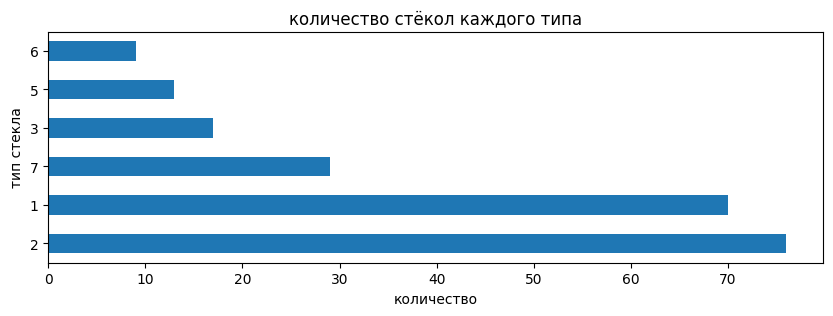

In [ ]:
import matplotlib.pyplot as plt

df_filter = df['Type'].value_counts()

plt.figure(figsize=(10, 3))
df_filter.plot(kind='barh', stacked=True)
plt.title('количество стёкол каждого типа')
plt.xlabel('количество')
plt.ylabel('тип стекла')
plt.show()

Количество классов не сбалансированное, основная часть это стёкла 1 и 2 типа.

Обучение случайного леса для классификации с выбросами.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = df['Type']
x = df.drop(columns='Type')

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

model = DecisionTreeClassifier(max_depth=8, random_state=10)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=10)

In [ ]:
print(f'точность на обучении: {model.score(x_train, y_train)}')
print(f'точность на тесте: {model.score(x_test, y_test)}')

точность на обучении: 0.9590643274853801
точность на тесте: 0.8372093023255814


Поиск и обработка выбросов.

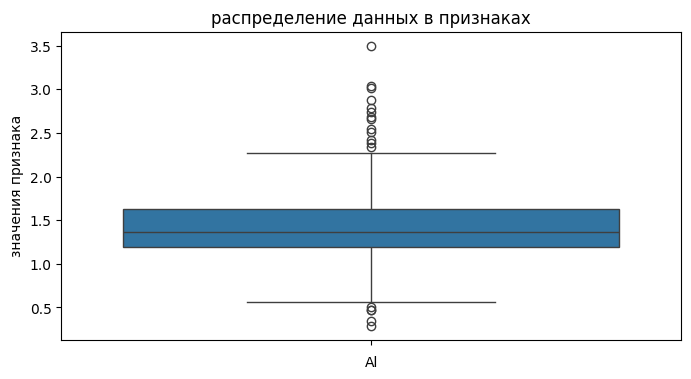

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(df['Al'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Al')
plt.show()

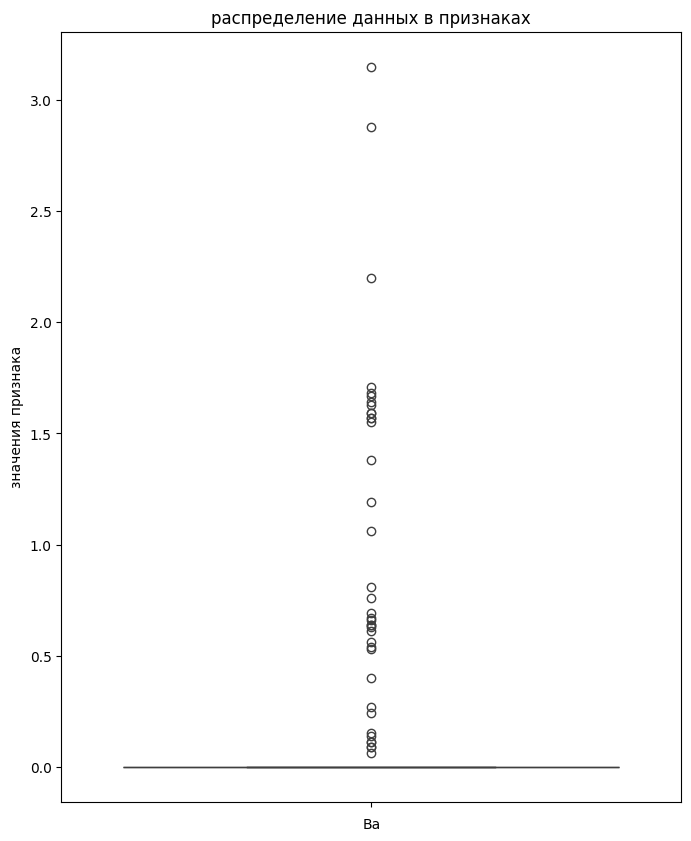

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(df['Ba'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Ba')
plt.show()

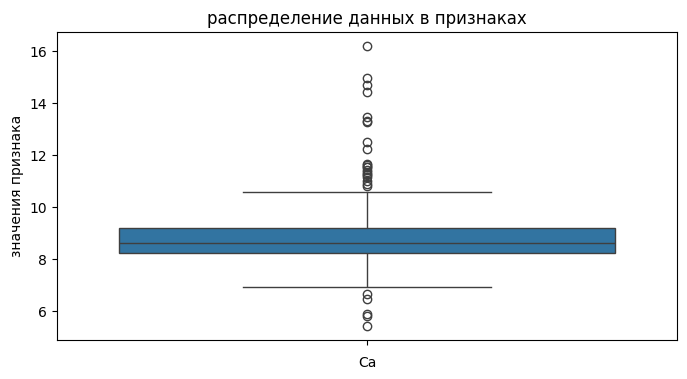

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Ca'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Ca')
plt.show()

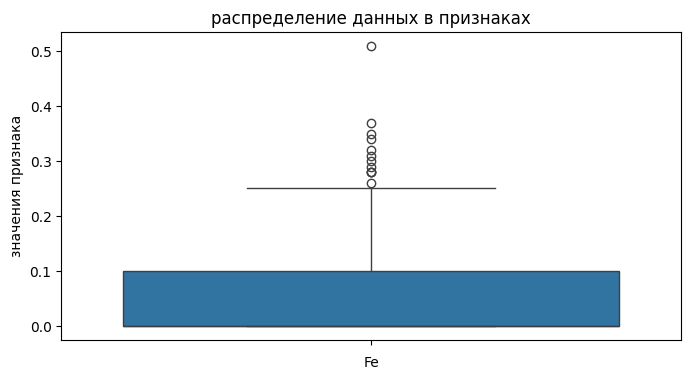

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Fe'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Fe')
plt.show()

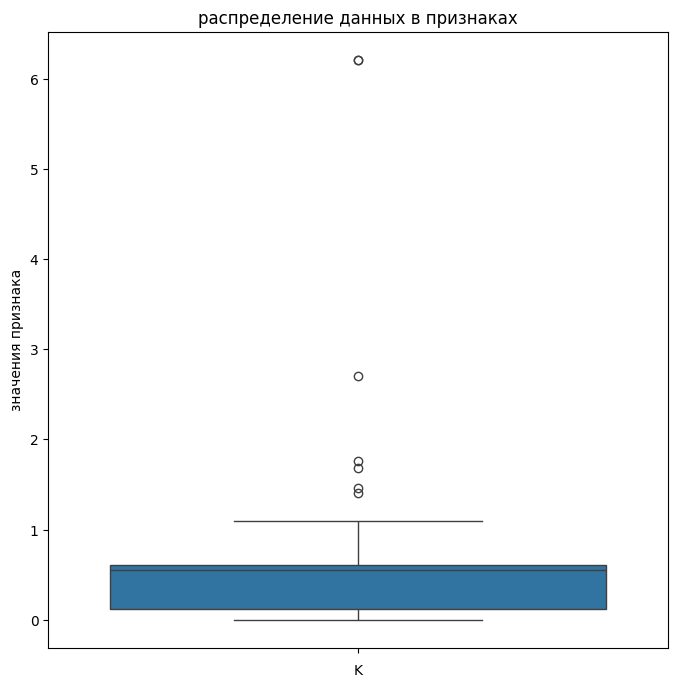

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(df['K'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('K')
plt.show()

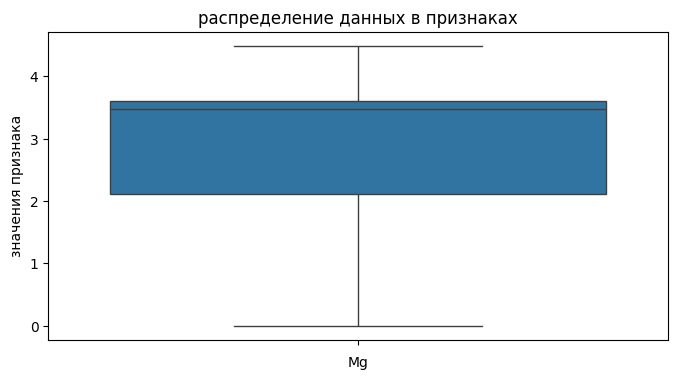

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Mg'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Mg')
plt.show()

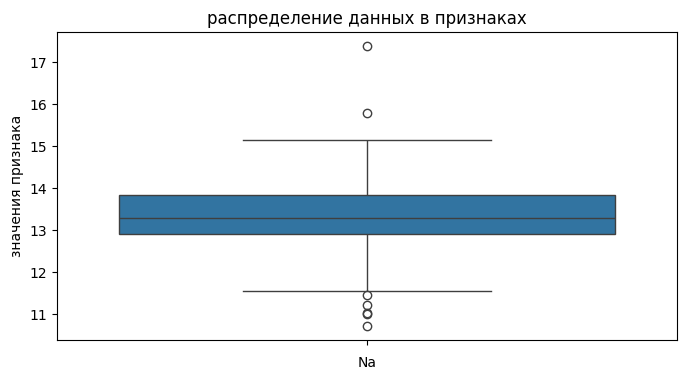

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Na'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Na')
plt.show()

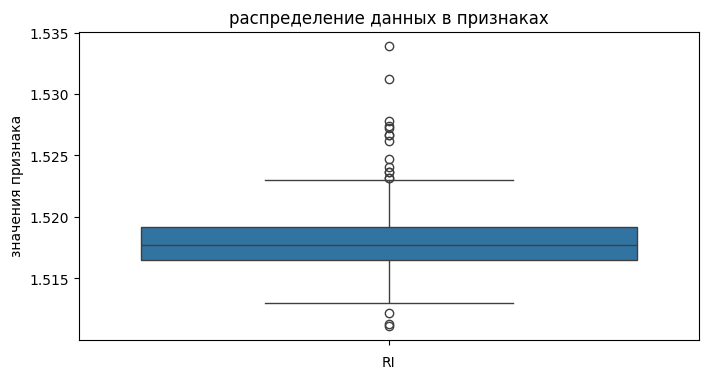

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['RI'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('RI')
plt.show()

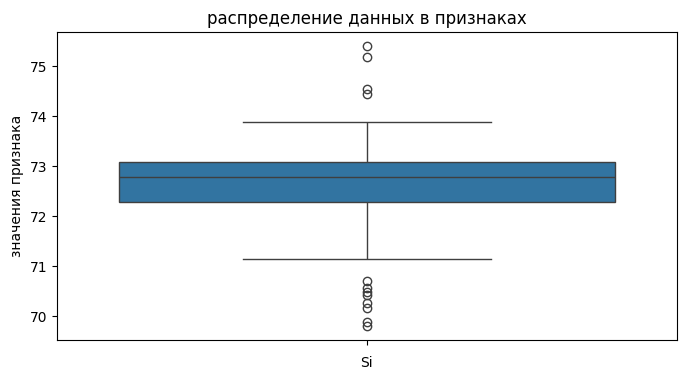

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Si'])
plt.title('распределение данных в признаках')
plt.ylabel('значения признака')
plt.xlabel('Si')
plt.show()

Из того, что видно на графике, нормальное распределение или близкое к нормальному есть в признаках: Mg, K и Na.

Обработаем выбросы с помощью опорных векторов и изоляционного леса и посмотрим сколько строк для каждого класса было удалено.

In [ ]:
#опорные вектора
from sklearn.svm import OneClassSVM

filter = OneClassSVM(nu=0.1)
filter.fit(df)

y_pred = filter.predict(df)
df_outlier = df[y_pred == -1]
df_outlier.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
58,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.00,0.00,1
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2


In [ ]:
counts = df['Type'].value_counts()
out_counts = df_outlier['Type'].value_counts()
procent = (out_counts/counts)*100
print(procent)

Type
1     5.714286
2     9.210526
3          NaN
5    23.076923
6    11.111111
7    24.137931
Name: count, dtype: float64


In [ ]:
#изоляционный лес
from sklearn.ensemble import IsolationForest

filter1 = IsolationForest(contamination=0.1)
filter1.fit(df)

y_pred1 = filter1.predict(df)
df_outlier1 = df[y_pred1==-1]
df_outlier1.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5


In [ ]:
counts1 = df['Type'].value_counts()
out_counts1 = df_outlier1['Type'].value_counts()
procent1 = (out_counts1/counts1)*100
print(procent1)

Type
1          NaN
2     9.210526
3     5.882353
5    38.461538
6    22.222222
7    24.137931
Name: count, dtype: float64


Обучаем модель на данных без выбросов.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df_clear = df[y_pred==1]
y1 = df_clear['Type']
x1 = df_clear.drop(columns='Type')

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42, test_size=0.2)

model1 = DecisionTreeClassifier(max_depth=8, random_state=10)

model1.fit(x1_train, y1_train)

DecisionTreeClassifier(max_depth=8, random_state=10)

In [ ]:
print(f'точность на обучении: {model1.score(x1_train, y1_train)}')
print(f'точность на тесте: {model1.score(x1_test, y1_test)}')

точность на обучении: 0.9738562091503268
точность на тесте: 0.7435897435897436


Я убрал выбросы через опорные вектора, потому что классы не сбалансированны, а изоляционный лес убрал много строчек в классах, которые в меньшенстве. Все таки обучать модель без выбросов не желательно, идёт переобучение.